In [1]:
# !pip install pdf2image

In [5]:
# !conda install -c conda-forge poppler 

^C


In [7]:
from pdf2image import convert_from_path
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image = convert_from_path('pdf.pdf')
for i in range(len(image)):
    image[i].save('img'+str(i)+'.jpg','JPEG')
    
file = r'img.jpg'
im = cv2.imread(file,0)

ret,thresh_value = cv2.threshold(im,180,255,cv2.THRESH_BINARY_INV)

# kernel = np.ones((5,5),np.uint8)
# dilated_value = cv2.dilate(thresh_value,kernel)


In [3]:
# !pip install opencv-contrib-python

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from PIL import Image
import pytesseract
import sys
pytesseract.pytesseract.tesseract_cmd=r"C:\Users\ShubhamSurya_ljtsrll\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
# try:
#     from PIL import Image
# except ImportError:
#     import Image
# import pytesseract

In [2]:
import os
path = os.path.abspath(pytesseract.__file__)
path

'C:\\Users\\ShubhamSurya_ljtsrll\\anaconda3\\envs\\myenv\\lib\\site-packages\\pytesseract\\__init__.py'

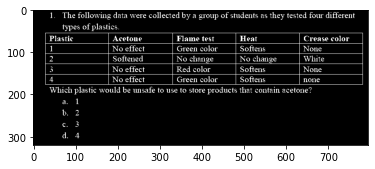

In [3]:
#read your file
file=r'image.jpg'
img = cv2.imread(file,0)
img.shape
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('imex.png',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()


In [4]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

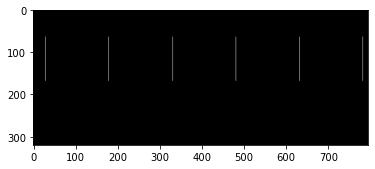

In [5]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

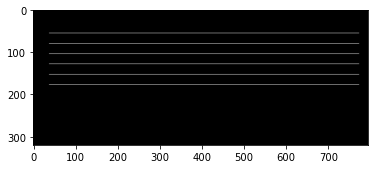

In [6]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

# Combine horizontal and vertical lines in a new third image, with both having same weight.

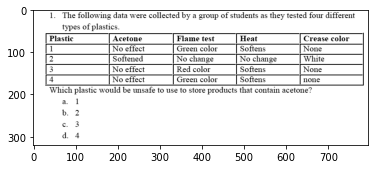

In [7]:
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [8]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
def sort_contours(cnts, method="left-to-right"):
    
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method='top-to-bottom')

In [10]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

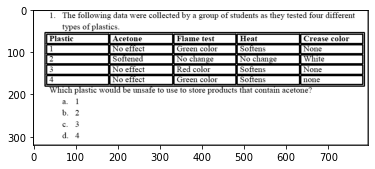

In [11]:
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.show()

In [12]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print(row)

[[635, 155, 147, 21], [484, 155, 148, 21], [334, 155, 147, 21], [182, 155, 149, 21], [32, 155, 147, 21]]
[[[0, 0, 795, 320]], [[28, 53, 758, 127], [635, 57, 147, 22], [484, 57, 148, 22], [334, 57, 147, 22], [182, 57, 149, 22], [32, 57, 147, 22]], [[635, 82, 147, 21], [484, 82, 148, 21], [334, 82, 147, 21], [182, 82, 149, 21], [32, 82, 147, 21]], [[635, 106, 147, 21], [484, 106, 148, 21], [334, 106, 147, 21], [182, 106, 149, 21], [32, 106, 147, 21]], [[635, 130, 147, 22], [484, 130, 148, 22], [334, 130, 147, 22], [182, 130, 149, 22], [32, 130, 147, 22]], [[635, 155, 147, 21], [484, 155, 148, 21], [334, 155, 147, 21], [182, 155, 149, 21], [32, 155, 147, 21]]]


In [13]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [14]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [15]:
#Regarding the distance to the columns center, the boxes are arranged in respective order
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

# Let’s extract the values

In [16]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [17]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file
data.to_excel('output.xlsx')

            0                                                  1  \
0               1. The following data were collected by a gro...   
1   Plastic\n   | Plastic | Acetone | Flame test | Heat | Cre...   
2                                                    No effect\n   
3                                                     Softened\n   
4                                                    No effect\n   
5                                                    No effect\n   

                2             3                4  
0                                                 
1    Flame test\n        Heat\n   Crease color\n  
2   Green color\n     Softens\n           None\n  
3     No change\n   No change\n          White\n  
4     Red color\n     Softens\n           None\n  
5   Green color\n     Softens\n           none\n  


In [18]:
data

,0,1,2,3,4
0,,1. The following data were collected by a group of students as they tested four different types of plastics. | Plastic | Acetone | Flame test | Heat | Crease color | 1 | No effect | Green color | Softens | None Soo plastic would be unsafe to use to store once that contain acetone? aw A b. 2 CG. 3 d. 4,,,
1,Plastic,| Plastic | Acetone | Flame test | Heat | Crease color | | No effect | Green color | Softens | None | | Softened | No change | No change | White | | No effect | Red color | Softens | None [4 (w;‘;é*CU No effect | Green color | Softens | none WILNtpe ) Acetone,Flame test,Heat,Crease color
2,,No effect,Green color,Softens,None
3,,Softened,No change,No change,White
4,,No effect,Red color,Softens,None
5,,No effect,Green color,Softens,none
